## Pacotes

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from interpolation import Interpolation
from scipy import special 

pi = np.pi
exp = np.exp
Erf = special.erf

## Conjuntos de dados

In [2]:
#Constants:
sigma = 1.0
mi = 4
mi_gauss = 0.0

#Range and points:
n = 500 #number of points
bins = 10 #number of bins

#Spaces
x = np.linspace(-5, 5.0, num=n)
x_dist3 = np.linspace(1,7,num=n)
s_list =np.random.uniform(0.0, 1.0, n)

In [3]:
# Distribuição uniforme

uniform = np.random.uniform(0,1,n) #pontos da distribuição uniforme

#Distribuição normal

#Função gaussiana:
def gauss (x):
    g =[]
        
    for j in range(0,len(x)): 
                
        g_i =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((x[j] - mi_gauss) / sigma, 2.0))
        
        g.append(g_i)
    return g

normal = gauss(x)

In [4]:
# Terceira Distribuição

def dist3 (x):
    g =[]
    for j in range(0,len(x)): 
        g_j =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] - mi) / sigma), 2.0))
        g_i=  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] + mi) / sigma), 2.0))
        a = Erf(mi / pow(2*sigma, 0.5))
        
        d = (g_j - g_i) / a
                
        g.append(d)
        
    return g

dist_3 = dist3 (x_dist3)

### 1) a) Amostras de N pontos das distribuições:

In [25]:
# Uniform:
#amostras dadas por uniform = np.random.uniform(0,1,n)

# Normal:
normal_dist = Interpolation(normal, x)
normal_points = normal_dist.sampler_list_points(s_list)

#Distribuição 3:
terceira_dist = Interpolation(dist_3, x)
ter_points = terceira_dist.sampler_list_points(s_list)


### b) Binagem

<Figure size 432x288 with 0 Axes>

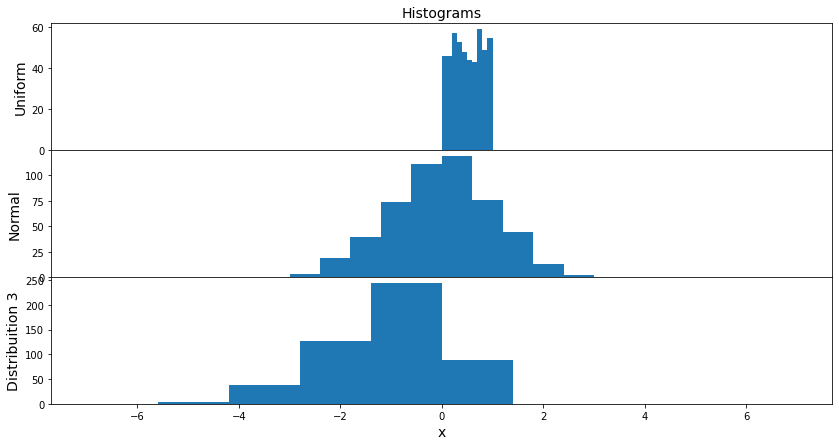

In [24]:
plt.figure()
fig, axs = plt.subplots (3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(14,7))

axs[0].hist(uniform, bins,[0.0, 1.0]) #histograma da uniforme
axs[1].hist(normal_points, bins, [-3.0, 3.0]) #histograma da normal
axs[2].hist(ter_points, bins, [-7, 7]) #histograma da terceira distribuição

axs[2].set_xlabel('x', fontsize=14)

axs[0].set_ylabel('Uniform', fontsize=14)
axs[1].set_ylabel('Normal', fontsize=14)
axs[2].set_ylabel('Distribuition 3', fontsize=14)

axs[0].set_title('Histograms', fontsize=14)

plt.show ()

In [33]:
#Numero de pontos em cada bin para as distribuições:

#Uniforme
uniform_bins_number = np.histogram(uniform)[0]

#Normal
normal_bins_number = np.histogram(normal_points)[0]

#Distribuition 3
dist3_bins_number = np.histogram(ter_points)[0]

print(uniform_bins_number, normal_bins_number, dist3_bins_number)

[46 46 57 53 48 44 43 59 49 55] [ 11  27  54  83  98 111  64  40  10   2] [  6  10  19  24  40  47  72  74 110  98]
